# IAU - Project

**Authors:** Peter Mačinec, Lukáš Janík

## Setup and import libraries

In [57]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Read the data

Data are divided into two files, *personal* and *other*, so we need to read both of them:

In [58]:
# read datasets
df1 = pd.read_csv('data/personal_train.csv')
df2 = pd.read_csv('data/other_train.csv')

## Basic analysis

At first, let's check number of records in each dataframe:

In [59]:
# dataframe with personal information
len(df1)

2237

In [60]:
# dataframe with other information
len(df2)

2287

#### Basic look at the data

In [61]:
df1.head()

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Terry Terry,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",63.0,M,1955-09-12
1,1,Edith Boudreaux,"PSC 4657, Box 5446\nAPO AP 58412",73.0,F,1945/04/30
2,2,Janet Washington,Unit 9759 Box 9470\nDPO AP 45549,74.0,F,1944-06-06
3,3,Margaret Chabot,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",49.0,F,1969-10-01
4,4,Colleen Satterwhite,"995 Frank Stravenue\nSouth Matthewport, TX 81402",2.0,F,2016-01-08


In [24]:
df2.head()

,Unnamed: 0,name,address,query hyperthyroid,T4U measured,FTI measured,lithium,TT4,T4U,capital-loss,...,personal_info,T3 measured,on antithyroid medication,referral source,education-num,psych,occupation,TBG measured,TBG,pregnant
0,0,Frances Pryor,"3060 Abigail Hollow\nLake Christopherchester, ...",f,t,t,f,120.0,0.82,0.0,...,White|United-States\nBachelors -- Separated|Un...,t,f,other,13.0,f,Prof-specialty,f,?,NaN
1,1,Marta Drees,"05614 Robert Keys Suite 721\nHarrisbury, UT 84817",t,t,t,f,93.0,1.14,0.0,...,White|United-States\nSome_college -- Never-mar...,t,f,other,10.0,f,Other-service,f,?,f
2,2,George Currie,"238 Schultz Cape\nNew Emilyton, AL 99522",f,t,t,f,100.0,0.88,0.0,...,White|United-States\nHS-grad -- Never-married|...,t,f,other,9.0,f,Machine-op-inspct,f,?,f
3,3,James Reynolds,"6509 Matthew Ville\nThomasfort, VA 84634",f,t,t,f,86.0,0.92,0.0,...,White|Mexico\nHS-grad -- Married-civ-spouse|Hu...,t,f,other,9.0,f,Machine-op-inspct,f,?,f
4,4,Jolene Tompkins,"85046 Wilkins Expressway Suite 780\nErictown, ...",f,t,t,f,167.0,1.21,0.0,...,White|United-States\nHS-grad -- Never-married|...,t,f,other,9.0,f,Adm-clerical,f,?,f


#### More interesting information about data

Check datatypes:

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 6 columns):
Unnamed: 0       2237 non-null int64
name             2237 non-null object
address          2237 non-null object
age              2236 non-null float64
sex              2237 non-null object
date_of_birth    2236 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 104.9+ KB


In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 39 columns):
Unnamed: 0                   2287 non-null int64
name                         2287 non-null object
address                      2287 non-null object
query hyperthyroid           2275 non-null object
T4U measured                 2276 non-null object
FTI measured                 2275 non-null object
lithium                      2282 non-null object
TT4                          2125 non-null float64
T4U                          2041 non-null float64
capital-loss                 2281 non-null float64
capital-gain                 2276 non-null float64
query hypothyroid            2282 non-null object
on thyroxine                 2282 non-null object
tumor                        2281 non-null object
TSH                          2042 non-null float64
T3                           1798 non-null float64
fnlwgt                       2279 non-null float64
FTI                          2278 non

Some interesting statistics for each column:

In [66]:
df1.describe(include='all')

,Unnamed: 0,name,address,age,sex,date_of_birth
count,2237.000000,2237,2237,2236.000000,2237,2236
unique,NaN,2236,2237,NaN,3,2175
top,NaN,Terry Murphy,"5776 Marshall Fork Suite 357\nJeffreyfort, MT ...",NaN,F,1958-10-21
freq,NaN,2,1,NaN,1448,3
mean,1118.000000,NaN,NaN,51.822004,NaN,NaN
std,645.910598,NaN,NaN,20.884439,NaN,NaN
min,0.000000,NaN,NaN,1.000000,NaN,NaN
25%,559.000000,NaN,NaN,36.000000,NaN,NaN
50%,1118.000000,NaN,NaN,54.000000,NaN,NaN
75%,1677.000000,NaN,NaN,67.000000,NaN,NaN


In [67]:
df2.describe(include='all')

,Unnamed: 0,name,address,query hyperthyroid,T4U measured,FTI measured,lithium,TT4,T4U,capital-loss,...,personal_info,T3 measured,on antithyroid medication,referral source,education-num,psych,occupation,TBG measured,TBG,pregnant
count,2287.000000,2287,2287,2275,2276,2275,2282,2125.000000,2041.000000,2281.000000,...,2283,2284,2278,2282,2052.000000,2279,2279,2273,2277,2124
unique,NaN,2236,2237,3,3,3,3,NaN,NaN,NaN,...,557,3,3,5,NaN,3,14,2,1,4
top,NaN,Jane Little,"75642 Deleon Forges\nFreemanton, WI 88183",f,t,t,f,NaN,NaN,NaN,...,White|United-States\nHS-grad -- Married-civ-sp...,t,f,other,NaN,f,Adm-clerical,f,?,f
freq,NaN,2,2,2135,2035,2035,2269,NaN,NaN,NaN,...,133,1800,2250,1328,NaN,2167,383,2272,2277,2020
mean,1143.000000,NaN,NaN,NaN,NaN,NaN,NaN,109.540424,0.997224,70.472600,...,NaN,NaN,NaN,NaN,5.419591,NaN,NaN,NaN,NaN,NaN
std,660.344355,NaN,NaN,NaN,NaN,NaN,NaN,35.917648,0.192969,363.415412,...,NaN,NaN,NaN,NaN,329.113932,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.310000,0.000000,...,NaN,NaN,NaN,NaN,-1600.000000,NaN,NaN,NaN,NaN,NaN
25%,571.500000,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.880000,0.000000,...,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN
50%,1143.000000,NaN,NaN,NaN,NaN,NaN,NaN,104.000000,0.980000,0.000000,...,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN
75%,1714.500000,NaN,NaN,NaN,NaN,NaN,NaN,125.000000,1.080000,0.000000,...,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN


#### NaN values in data

Are there any missing values?

In [68]:
df1.isnull().values.any(), df2.isnull().values.any()

(True, True)

Missing values per each column would tell something more:

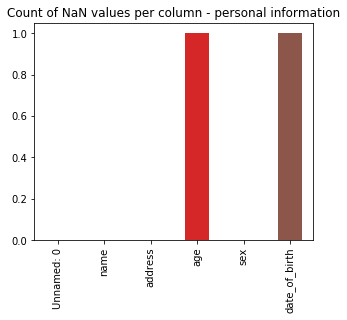

In [69]:
df1.isnull().sum().plot(kind='bar', title='Count of NaN values per column - personal information')

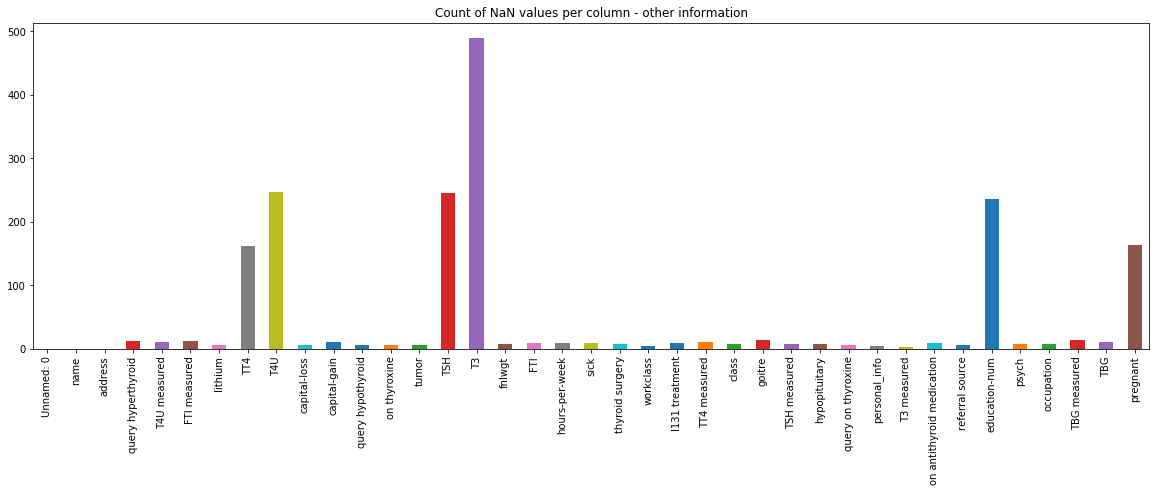

In [70]:
plt.rcParams['figure.figsize'] = (20, 6)
df2.isnull().sum().plot(kind='bar', title='Count of NaN values per column - other information')
plt.rcParams['figure.figsize'] = (5, 4)

## Attribute analysis

### Numerical attributes

### Categorical attributes

## TO-DO

* set index to column Unnamed: 0 and rename that column

# TEST1

# TEST2

# TEST3